# Exercices 2 : Gérer des données

_pandas_

Documentation :

https://pandas.pydata.org/docs/user_guide/index.html

Des liens utiles :

https://datatofish.com/python-tutorials/

https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

## Ex 2.0 : Introduction à Pandas

### 1 : DataFrame : Généralités

L'objet DataFrame sera un tableau de données que l'on peut initialiser avec un dictionnaire de listes par exemple.

``` d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]} #dictionnaire ```

Donne alors si on l'affiche avec ``` pd.DataFrame(d) ``` (retourne un objet DataFrame)
```
   one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0
```

Vous pouvez afficher les n premières lignes avec la méthode ``` dafaframe.head(2) ``` qui par exemple ne conservera que les deux premières lignes.

### 2 : iloc - L'accès à une sous-partie des données

Source dans la doc : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

Le code suivant effectue les tâches :

1. Il crée la dataframe df à partir du dictionnaire d (généré à partir des noms de colonne et du module random)
2. Puis il extrait seulement les lignes de 1 et 2 et les affiche.
3. Il extrait ensuite les lignes 1, 3 et 5
4. Il ajoute la colonne nommée "six"
5. Il affiche les lignes de 0 à 5 (exclu) des colonnes 'trois' et 'quatre'
6. Il convertit les données en entiers

***Vos actions :***
1. Extrayez les colonnes 'un' et 'deux' et affichez-les (deux méthodes existent, avec iloc ou sans)
2. Remplacez la colonne "trois" par la série [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
3. Affichez les 5 premières lignes des colonnes "deux", "quatre" et "six"

In [ ]:
import pandas as pd
import random as rd
colonnes = ['un', 'deux', 'trois', 'quatre', 'cinq']
d = { col: [round(rd.random()*5,1) for _ in range(10)] for col in colonnes } #dictionnaire
df = pd.DataFrame(d) #création d'un dataframe
print(df)

# lignes 1 et 2
new_df = df.iloc[1:3]
print(new_df)
# lignes 1 et 3 et 5
new_df = df.iloc[[1, 3, 5]]
print(new_df)
# colonne 6 ajoutée
df["six"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(df)
# prend lignes 0 à 5 pour colonnes trois et quatre
new_df = df.iloc[0:5, 2:4]
print(new_df)
# conversion de type
print(df.astype(int))


# A Faire

## Ex 2.1 : Librairie pandas

_importer avec alias_

Importez la librairie pandas, sous le nom pd, puis avec les méthodes vues précédemment, chargez le contenu de l'adresse http://www.tennis-data.co.uk/2021/2021.xlsx dans une variable reponse.

C'est un fichier de données au format Excel, mais pandas permet de le lire avec l'ordre ```pd.read_excel(reponse.content)``` qui retourne un objet du type DataFrame.
Stockez cet objet dans une variable "stats"

Récupérez les 10 premières lignes de ce fichier à l'aide de la commande ```stats.head(10)```, puis affichez-les


In [3]:
import requests as rq
import pandas as pd # pour pandas
reponse = rq.get("http://www.tennis-data.co.uk/2021/2021.xlsx")# récupération de la réponse avec rq.get
# suite à la réponse, on récupère le contenu de la réponse et ouverture dans pandas du fichier Excel
stats=pd.read_excel(reponse.content)
print(stats.head(10))

   ATP Location    Tournament       Date  Series   Court Surface      Round  \
0    1  Antalya  Antalya Open 2021-01-07  ATP250  Indoor    Hard  1st Round   
1    1  Antalya  Antalya Open 2021-01-07  ATP250  Indoor    Hard  1st Round   
2    1  Antalya  Antalya Open 2021-01-07  ATP250  Indoor    Hard  1st Round   
3    1  Antalya  Antalya Open 2021-01-07  ATP250  Indoor    Hard  1st Round   
4    1  Antalya  Antalya Open 2021-01-07  ATP250  Indoor    Hard  1st Round   
5    1  Antalya  Antalya Open 2021-01-07  ATP250  Indoor    Hard  1st Round   
6    1  Antalya  Antalya Open 2021-01-08  ATP250  Indoor    Hard  1st Round   
7    1  Antalya  Antalya Open 2021-01-08  ATP250  Indoor    Hard  1st Round   
8    1  Antalya  Antalya Open 2021-01-08  ATP250  Indoor    Hard  1st Round   
9    1  Antalya  Antalya Open 2021-01-08  ATP250  Indoor    Hard  1st Round   

   Best of           Winner  ... Lsets    Comment  B365W  B365L   PSW   PSL  \
0        3  Basilashvili N.  ...   1.0  Completed  

## Ex 2.2 : Filtrer des données

Les possibilités de pandas sont innombrables, effectuez les actions suivantes dans le script ci-dessous :

1. Téléchargez le fichier et enregistrez-le dans un fichier nommé "pokemon.csv" (par exemple avec la librairie requests)
1. Ajoutez une fonction qui vérifiera la présence ou non du fichier "pokemon.csv" avant de télécharger celui-ci. S'il n'est pas présent on télécharge s'il est présent on ouvre le fichier. Rappel : importez le module "os" et pour tester la présence d'un fichier c'est  

        os.path.isfile("chemin/monfichier")

1. Mettez la base de données dans la variable pokemon comme ceci : ```pokemon = pd.read_csv("pokemon.csv")``` 
    en cas de problème d'encodage ('utf-8'), utilisez pandas.read_csv sur le fichier *monfichier* avec l'argument kwarg (kwarg : KeyWordARGument)  
    ``` 
    encoding_errors="ignore" 
    ```
1. Combien y a-t-il de pokemons dans cette base de données ? ```len(pokemon.index)``` permet de répondre à cette question.
1. Quelle est leur valeur de défense moyenne ? En attaque ? Vous pouvez obtenir une moyenne directement en faisant ```pokemon.Defense.mean()```
1. Filtrer une dataframe : par exemple si vous voulez le nom et la vitesse des pokemons de type "Dragon", vous écrirez :
    ```
    print(pokemon[pokemon.Type == "Dragon"][["Name", "Speed"]])
    ```
    Sortez la liste des noms et attaque des 15 premiers pokemons dont l'attaque est supérieure à la défense
1. Sur ces derniers, combien ont-ils de points de vie en moyenne ? Et combien sont-ils ?  
    Pour arrondir une valeur obtenue, utilisez l'un des deux :  
    ``` 
    int(variable)
    round(variable, nbdecimales) 
    ```

In [15]:
# coding: utf-8
import os
import pandas as pd
import requests as rq

def isFile(path):
    if(os.path.isfile("pokemon.csv")):
        return True
    else:
        return False

poke=rq.get("http://srea64.github.io/msan622/project/pokemon.csv")
f=open("pokemon.csv","w")
f.write(poke.text)
f.close()

if(isFile("pokemon.csv")):
    pokemons=pd.read_csv("pokemon.csv")
    print("nb pokemons ",len(pokemons))
    print("défense moyenn des pokemons","%.2f"%pokemons.Defense.mean(),"\n Attaque moyenne : ",round(pokemons.Attack.mean()),2)
    firsts=pokemons[pokemons.Attack>pokemons.Defense][['Name','Defense','Attack','Health Points']][:15]
    print("Noms et Attack des pokemons qui ont lattaque plus gros que la defene;  :\n",firsts)
    

nb pokemons  778
défense moyenn des pokemons 72.97 
 Attaque moyenne :  78 2
Noms et Attack des pokemons qui ont lattaque plus gros que la defene;  :
                 Name  Defense  Attack  Health Points
4         Charmander       43      52             39
5         Charmeleon       58      64             58
6          Charizard       78      84             78
7   Mega Charizard X      111     130             78
8   Mega Charizard Y       78     104             78
16            Weedle       30      35             40
18          Beedrill       40      90             65
19            Pidgey       40      45             40
20         Pidgeotto       55      60             63
21           Pidgeot       75      80             83
22           Rattata       35      56             30
23          Raticate       60      81             55
24           Spearow       30      60             40
25            Fearow       65      90             65
26             Ekans       44      60             35


AttributeError: 'DataFrame' object has no attribute 'HealthPoints'

## Ex 2.3 : traiter les données

Pour traiter les données, nous aurons besoin de créer des DataFrame spécifiques, en filtrant la table des données.  

On va dénombrer combien de Pokémons de chaque génération a une attaque supérieure ou égale à 80.

1. Créez deux listes de valeurs : une liste des générations nommées "G 1", "G 2" etc. de 1 à 6, et avec une boucle sur **generation** allant de 1 à 6, comptez le nombre de pokemon dont l'attaque est supérieure ou égale à 80 pour la génération **generation** et faites-en une liste de 6 entiers.
    Vous appellerez par exemple ```tab_id``` et ```tab_nb``` ces deux listes.
    Et pour compter on peut
    1. Obtenir la longueur de la liste d'index de la dataframe filtrée sur ```(pokemon.Attack >= 80) & (pokemon.Generation == i)``` (remarquez le "&" pour combiner deux conditions)
    1. Redéfinir les Pokémons dont l'attaque est >= 80 dans une nouvelle DataFrame ```big_pok``` par exemple et appliquer la méthode ```value_counts("Generation")``` qui va compter les occurrences de chaque valeur du champ "Generation" et mettre tout ça dans un tableau.
        Mais comme le tableau renvoyé est trié par ordre de compte décroissant on voudra alors le retrier par ordre des index croissant en faisant :
        ```
        big_pok.value_counts("Generation").sort_index()
        ```
1. Recréer une nouvelle DataFrame ```new_df``` avec les deux colonnes : ```generation``` et ```nbPokemon```
1. Afficher directement un graphique en barre pour mettre ces stats en valeur en faisant :
    ```
    new_df.plot.bar(x="generation", y="nbPokemon", rot=0, title="Nombre de pokemons avec attaque supérieure à 80 par génération")
    ```

Exemple de graph à obtenir :  


![graph en barre](exBar.png)



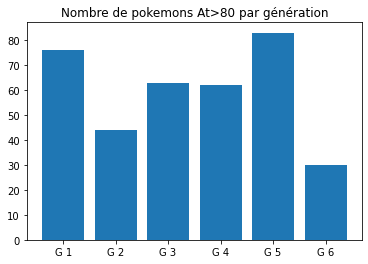

In [37]:
# coding: utf-8
# votre script ici


## Ex 2.4 : Tableau croisé (pivot_table)

Lorsque l'on veut exploiter des données complexes, on peut être amené à exprimer certaines données en fonction des autres au sein du même tableau.  
Par exemple pour refaire l'exemple précédent, il "suffirait" de dire qu'on veut mettre la Génération en index et dans une colonne appelée 'nbPok' (par exemple) le nombre de pokemons correspondant.  
Ce qu'on pourrait simplement faire avec :  
``` pivot_table(index='Colonne_à_utiliser_en_index', values='Le_champ_sur_lequel_compter', aggfunc='fonction_à_utiliser') ```  

Les fonctions (keyword argument : aggfunc) les plus usuelles seront :  
``` count / sum / mean / max / min / rank ... ```  

Ici on utilisera simplement "count" sur n'importe quel champ pour compter combien il y a de pokemons

Reprenez le code donné en exemple pour :
1. Afficher le graphique de la moyenne en attaque des Pokémons par génération
1. Afficher le graphique avec deux barres : moyenne en attaque et moyenne en défense par génération
1. Afficher l'attaque moyenne par 'Type' de Pokémon 
    On ne gardera que le premier Type du Pokémon, pour cela on va "parser" le type, et garder le premier mot uniquement (mis en format Capital : première lettre en majuscule)
    
    Pour cela on peut redéfinir la colonne "Type" de la Dataframe :
    ```
    pokemon['Type'] = pokemon['Type'].str.split(' ').str[0].str.capitalize()
    ```

            Name
Generation      
1             76
2             44
3             63
4             62
5             83
6             30


<AxesSubplot:title={'center':'Nombre de pokemons avec attaque supérieure à 80 par génération'}, xlabel='Generation'>

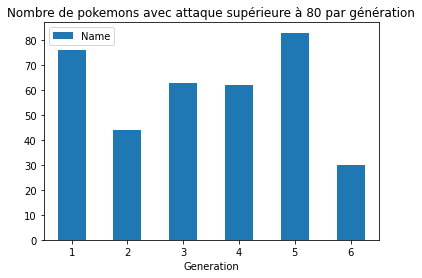

In [1]:
# coding: utf-8
# script à continuer
import pandas as pd

# pokemon est lu depuis le fichier
pokemon = pd.read_csv("pokemon.csv")
# création du tableau croisé
pokCount = pokemon[pokemon.Attack >= 80].pivot_table(index='Generation', values='Name', aggfunc='count')
print(pokCount)
pokCount.plot.bar(title="Nombre de pokemons avec attaque supérieure à 80 par génération", rot=0)

# ---------------------------- A compléter ----------------------------

